In [26]:
#import library
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Fandango


In [27]:
# explore fandango data
fandango = pd.read_csv('C:/kaggle/fandango/fandango.csv')
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
505,Valiyavan (2015),0.0,0.0,0
506,WWE SummerSlam 2015 (2015),0.0,0.0,0
507,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
508,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [28]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [29]:
fandango.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


Text(0.5, 1.0, 'Votes/Rating corr')

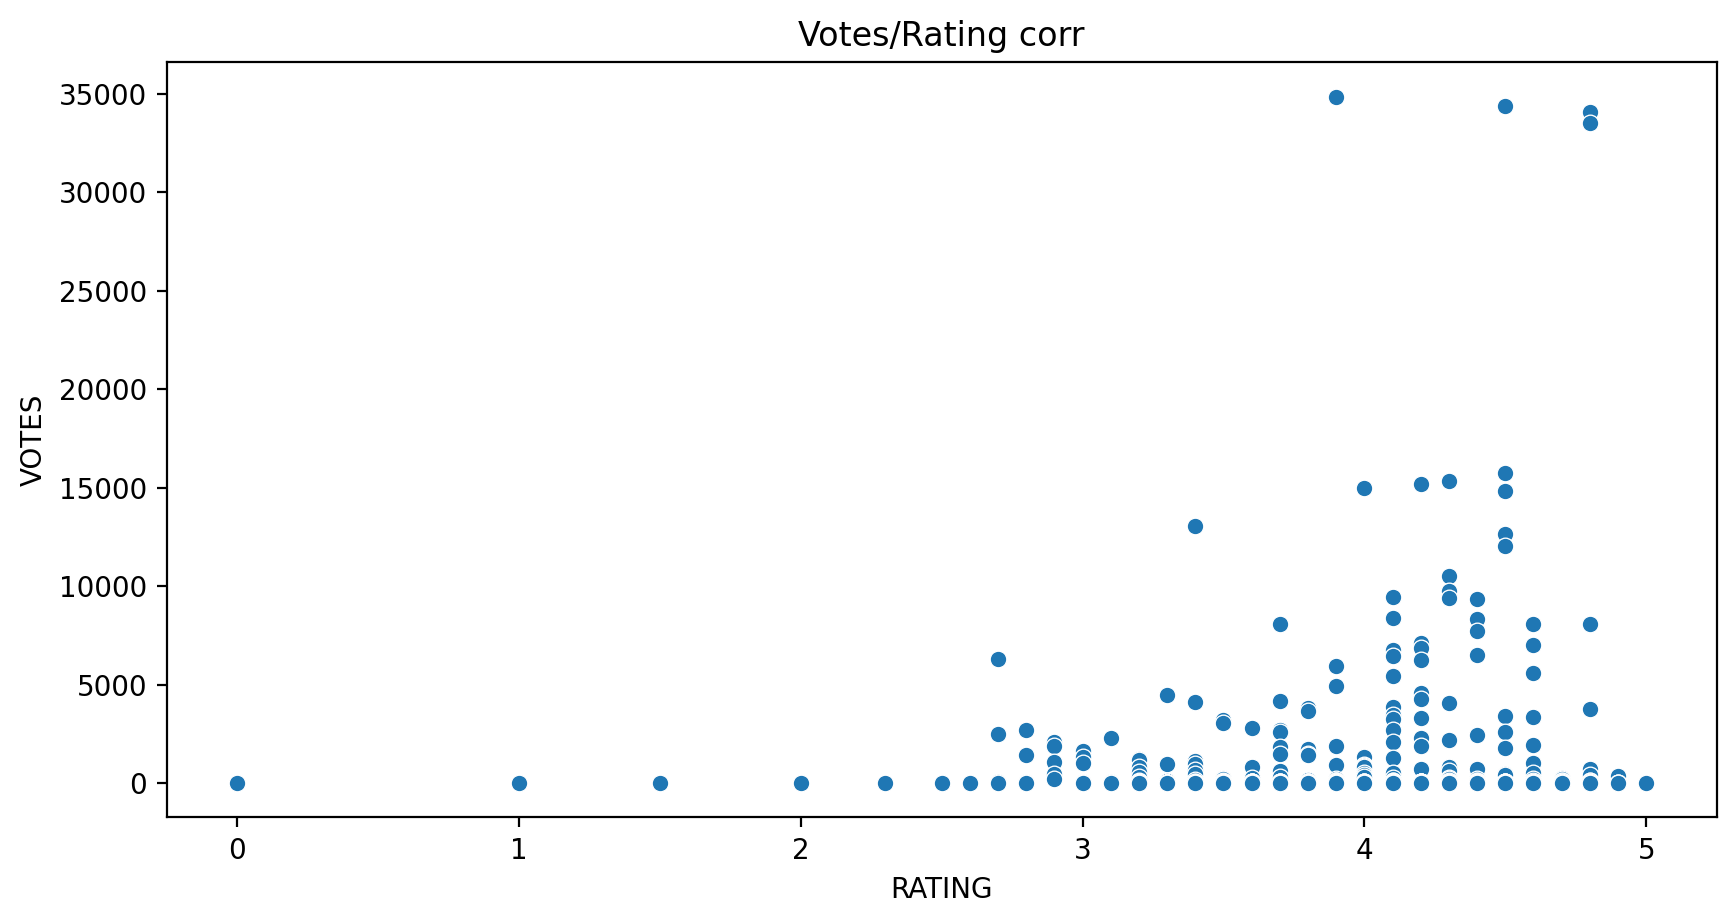

In [30]:
plt.figure(figsize=(10,5),dpi= 200)
sns.scatterplot(data=fandango, y='VOTES',x='RATING')
plt.title('Votes/Rating corr')

In [31]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


In [32]:
# Extract years from Film
fandango['YEARS']=fandango.FILM.str.extract(r"\((\d+)\)")

In [33]:
#Standart columns name
fandango = fandango.rename(columns=str.lower)
#Film count in years
fandango.groupby('years',as_index=False).film.count()

,years,film
0,1,7
1,1964,1
2,2014,24
3,2015,477
4,2016,1


<AxesSubplot:title={'center':'number of films a year'}, xlabel='years'>

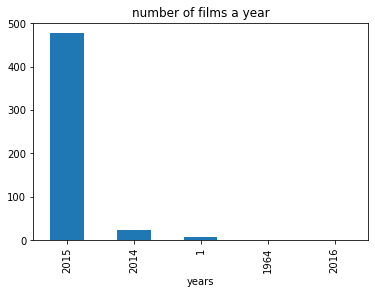

In [34]:
fandango.groupby('years').film.count().sort_values(ascending=False).plot(kind='bar', title='number of films a year')

In [35]:
#top 10 popular film
fandango.sort_values(by='votes').tail(10)[::-1]

,film,stars,rating,votes,years
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [36]:
#Drop movies with 0 votes
fandango = fandango.drop(fandango[fandango['votes']==0].index)

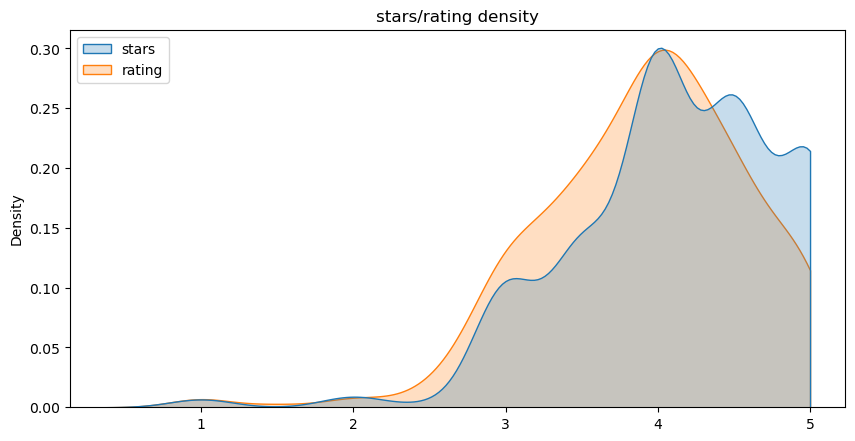

In [37]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.kdeplot(data = fandango.drop('votes',axis=1),fill=True,clip=(0,5))
plt.title('stars/rating density')
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
move_legend(ax,'upper left')

In [38]:
fandango[fandango.years=='1']

,film,stars,rating,votes,years
393,We Come as Friends (1),4.0,4.0,2,1
422,The Mend (1),4.0,4.0,1,1


In [39]:
fandango['stars_diff']=round(fandango.stars-fandango.rating,1)
fandango

,film,stars,rating,votes,years,stars_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='stars_diff', ylabel='count'>

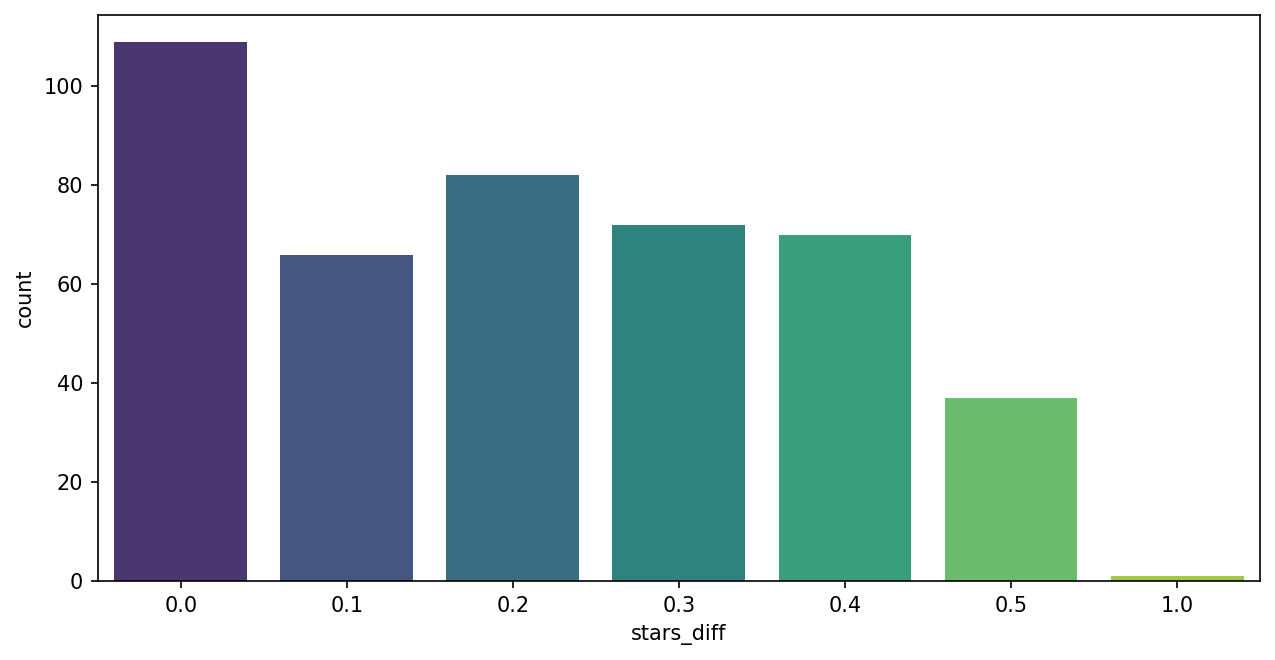

In [40]:
plt.figure(figsize=(10,5),dpi=150)
sns.countplot(data=fandango, x = 'stars_diff',palette='viridis')

In [41]:
fandango[fandango.stars_diff==1]

,film,stars,rating,votes,years,stars_diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Other Sites and Fandango

## RottenTomatoes

In [42]:
df = pd.read_csv("C:/kaggle/fandango/Other_site(FandangoDataset).csv")
df

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

<AxesSubplot:title={'center':'types data'}>

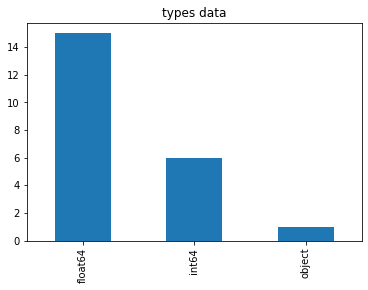

In [44]:
df.dtypes.value_counts().plot(kind='bar',title='types data')


In [45]:
df.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


(0.0, 100.0)

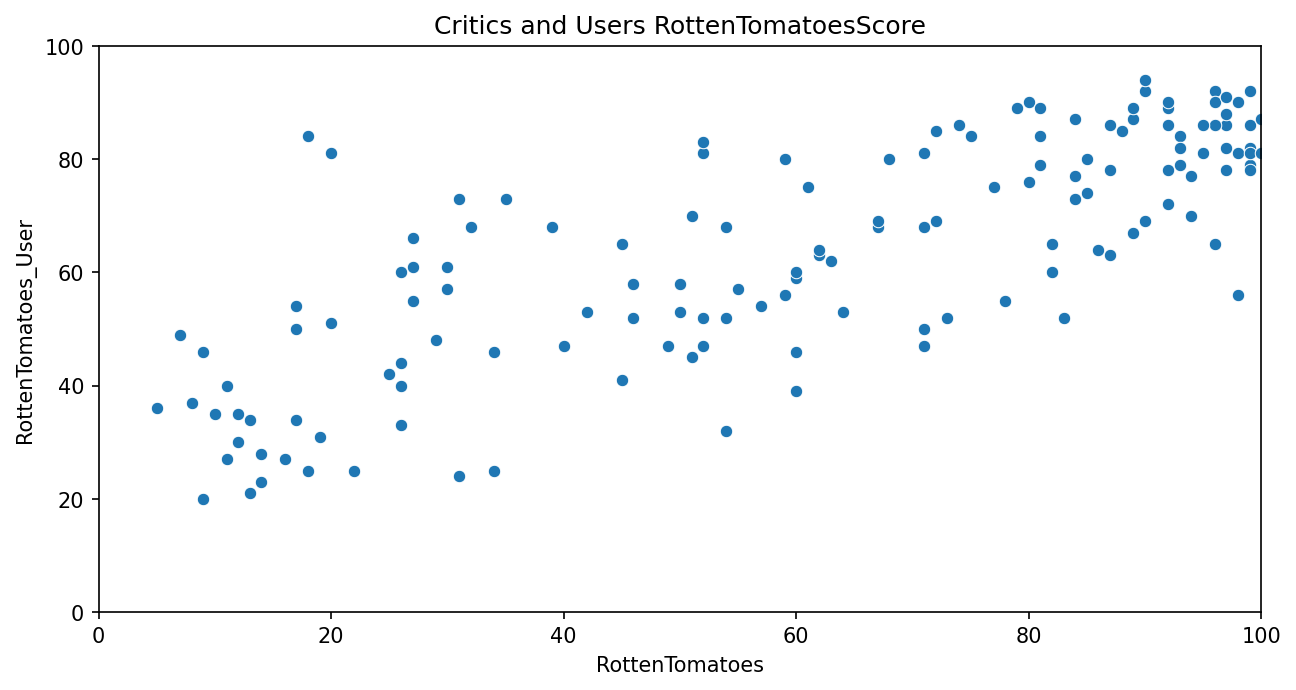

In [63]:
plt.figure(figsize=(10,5) ,dpi =150)
sns.scatterplot(data=df, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.title('Critics and Users RottenTomatoesScore')
plt.ylim(0,100)
plt.xlim(0,100)

In [47]:
df['RT_critics_and_users_diff'] =(df.RottenTomatoes-df.RottenTomatoes_User)
df.RT_critics_and_users_diff.abs().mean()

15.095890410958905

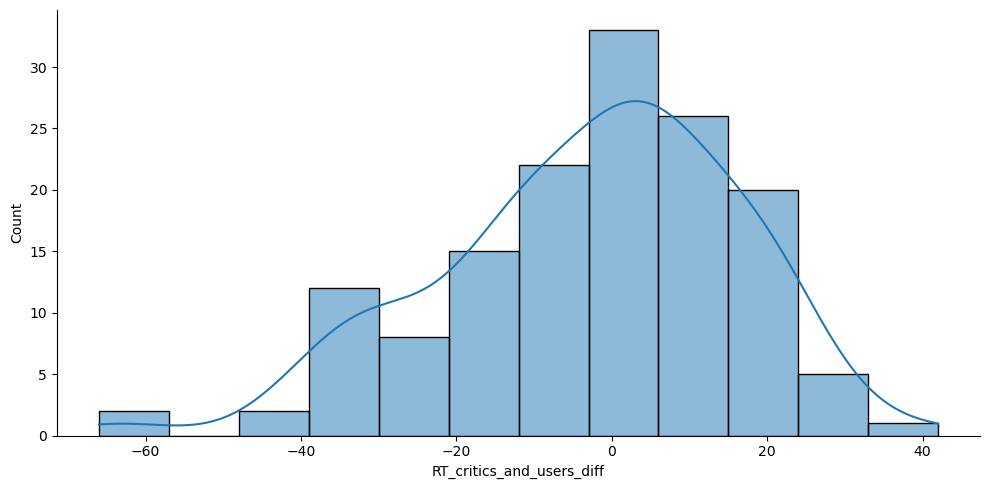

In [48]:
sns.displot(x=df.RT_critics_and_users_diff,kde=True,height=5, aspect=2)
fig = plt.gcf()
fig.set_dpi(100)

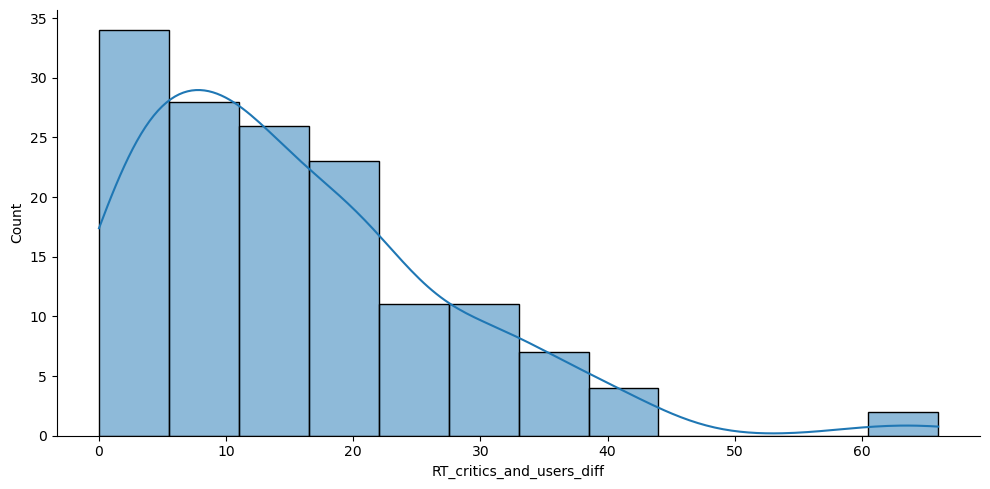

In [49]:
sns.displot(x=df.RT_critics_and_users_diff.abs(),kde=True,height=5, aspect=2)
fig = plt.gcf()
fig.set_dpi(100)

In [50]:
print('Users loves but critics hate')
df[df.RT_critics_and_users_diff<0].sort_values('RT_critics_and_users_diff')[['FILM','RT_critics_and_users_diff']].head(5)

Users loves but critics hate


,FILM,RT_critics_and_users_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [51]:
print(' Critics loves but Users hate')
df[df.RT_critics_and_users_diff>0].sort_values('RT_critics_and_users_diff',ascending=False)[['FILM','RT_critics_and_users_diff']].head(5)

 Critics loves but Users hate


,FILM,RT_critics_and_users_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
40,I'll See You In My Dreams (2015),24


## Metacritic


(0.0, 100.0)

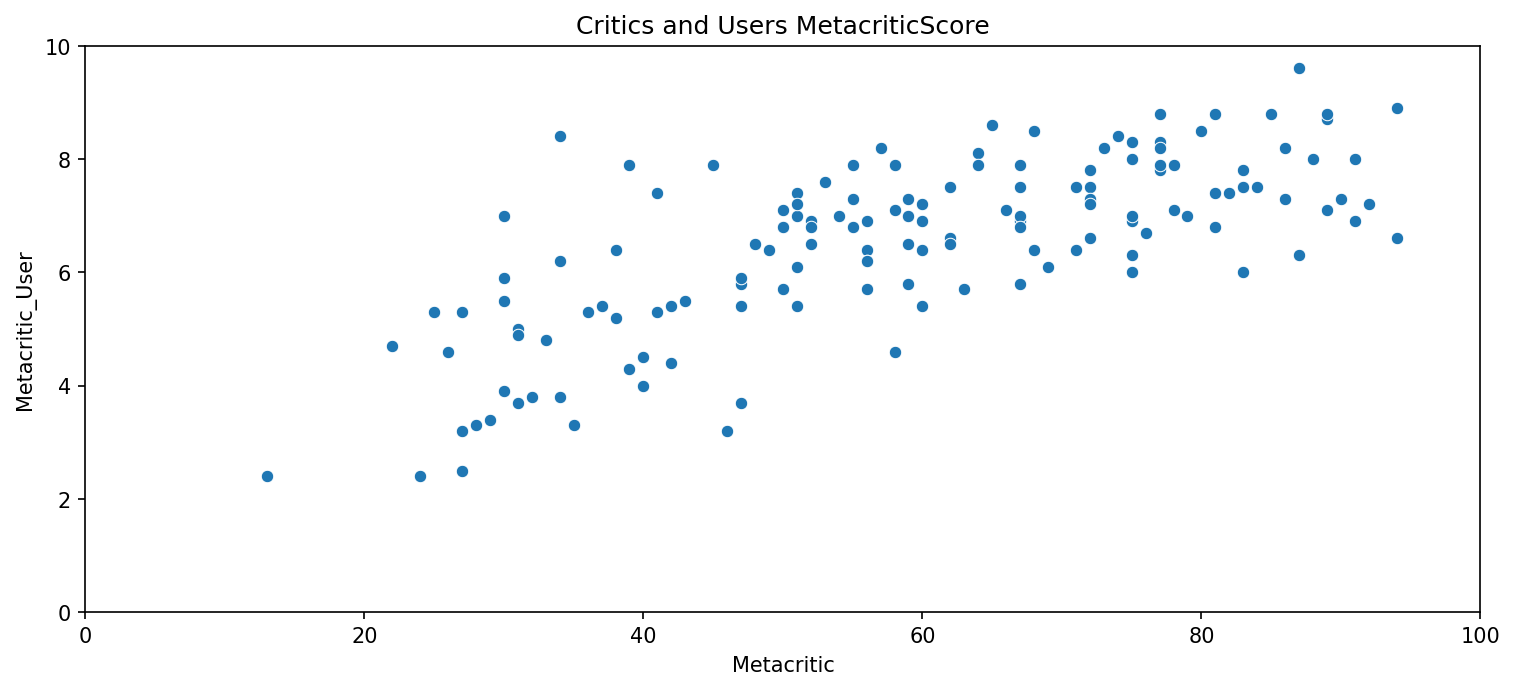

In [64]:
plt.figure(figsize=(12,5) ,dpi =150)
sns.scatterplot(data=df, x = 'Metacritic', y = 'Metacritic_User')
plt.title('Critics and Users MetacriticScore')
plt.ylim(0,10)
plt.xlim(0,100)

Text(0.5, 1.0, 'Metacritic_user_vote_count and IMDB_user_vote_count')

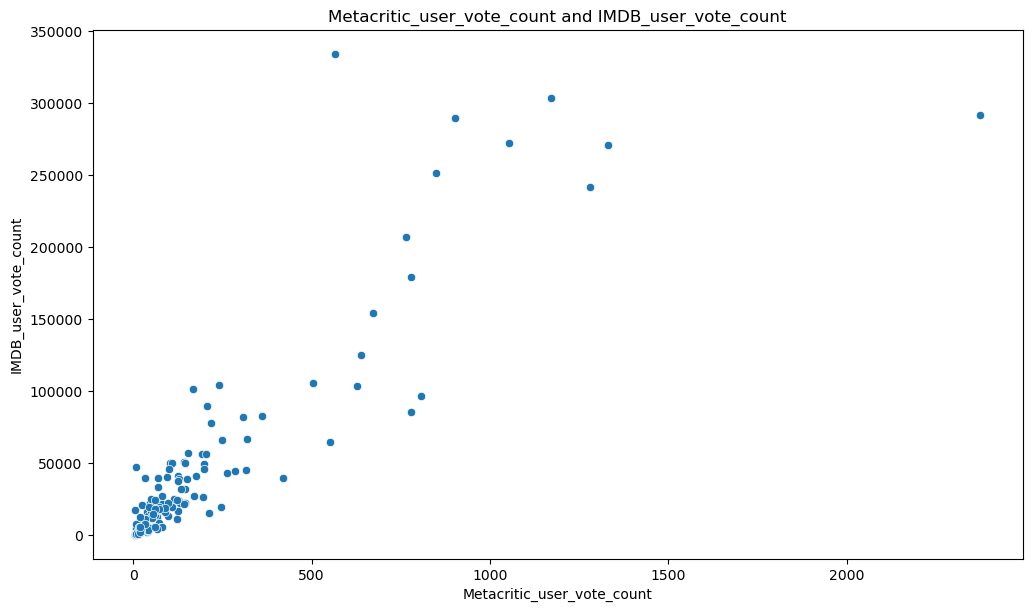

In [53]:
plt.figure(figsize=(12,7) ,dpi =100)
sns.scatterplot(data=df, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')
plt.title('Metacritic_user_vote_count and IMDB_user_vote_count')

In [65]:
df.sort_values('Metacritic_user_vote_count').tail(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RT_critics_and_users_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.5,4.3,4.85,4.4,...,5.0,4.5,4.5,4.5,4.0,2375,292023,10509,0.2,9


In [66]:
df.sort_values('IMDB_user_vote_count').tail(1)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,RT_critics_and_users_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,5.0,4.6,4.5,4.6,...,4.5,4.5,3.5,4.0,4.0,566,334164,8055,0.4,-2


In [55]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference', 'RT_critics_and_users_diff'],
      dtype='object')

In [68]:
RT_norm = np.round(df.RottenTomatoes/20,1)
RTU_norm = np.round(df.RottenTomatoes_User/20,1)
Meta_norm = np.round(df.Metacritic/20,1)
MetaU_norm = np.round(df.Metacritic_User/2,1)
IMDB_norm = np.round(df.IMDB/2,1)
normalize_rating=pd.concat([df.Fandango_Stars,df.Fandango_Ratingvalue,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm], axis=1,names=['Fandango_Stars', 'Fandango_Ratingvalue','RT_norm','RTU_norm','Meta_norm','MetaU_norm','IMDB_norm'])
normalize_rating

,Fandango_Stars,Fandango_Ratingvalue,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,5.0,4.5,3.7,4.3,3.3,3.6,3.9
1,5.0,4.5,4.2,4.0,3.4,3.8,3.6
2,5.0,4.5,4.0,4.5,3.2,4.0,3.9
3,5.0,4.5,0.9,4.2,1.1,2.4,2.7
4,3.5,3.0,0.7,1.4,1.4,1.7,2.6
...,...,...,...,...,...,...,...
141,4.0,4.0,4.4,3.9,3.4,4.0,3.7
142,3.5,3.5,4.8,4.1,4.2,3.8,3.6
143,3.5,3.5,4.8,3.9,4.4,4.4,3.7
144,3.5,3.5,5.0,4.0,4.5,3.6,3.9


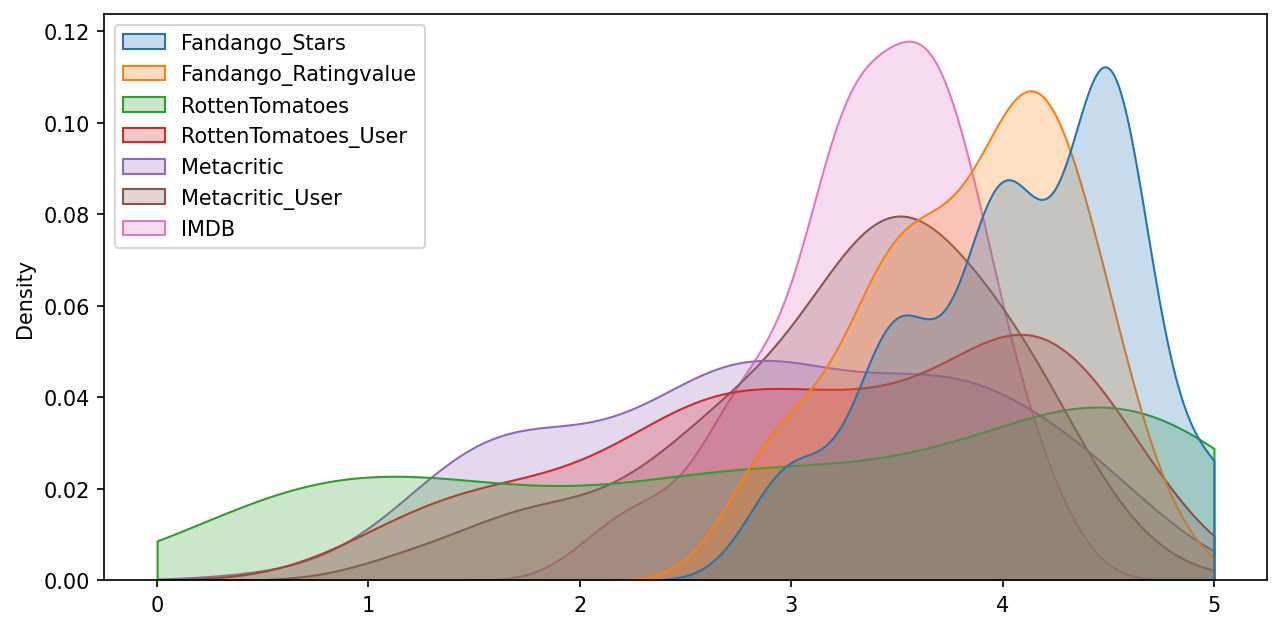

In [57]:
plt.figure(figsize=(10,5),dpi=150)
ax=sns.kdeplot(data = normalize_rating,fill=True,clip=(0,5))

    
move_legend(ax, "upper left")


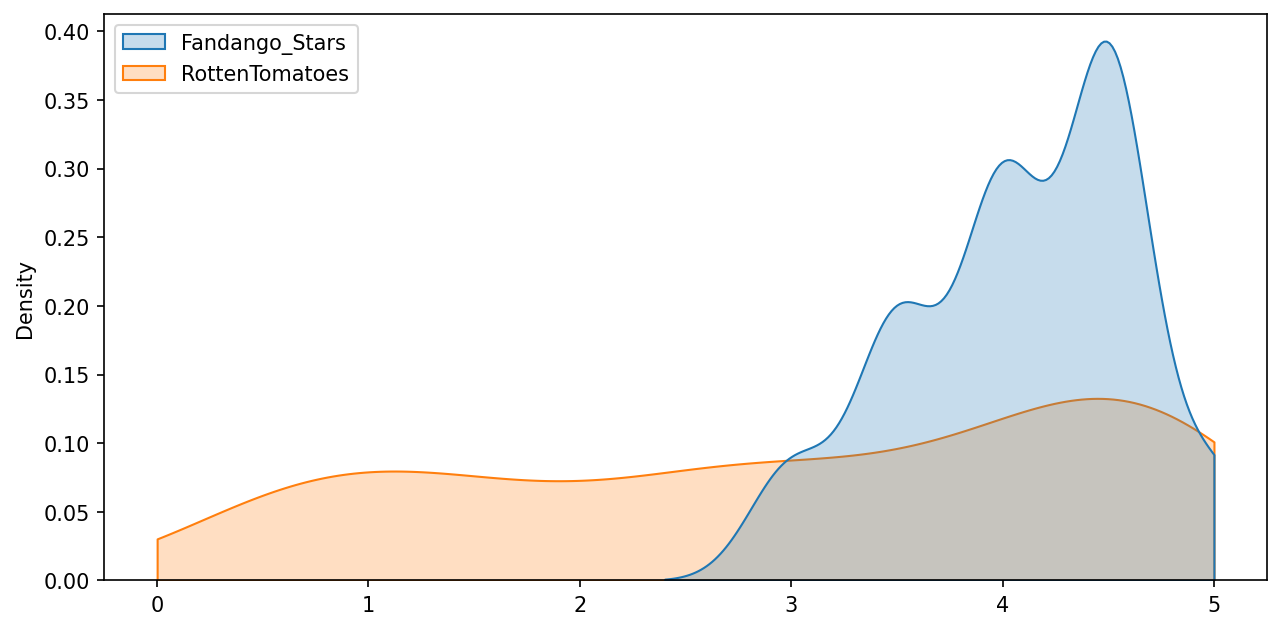

In [58]:
plt.figure(figsize=(10,5),dpi=150)
ax=sns.kdeplot(data = normalize_rating[['Fandango_Stars','RottenTomatoes']],fill=True,clip=(0,5))
move_legend(ax, "upper left")


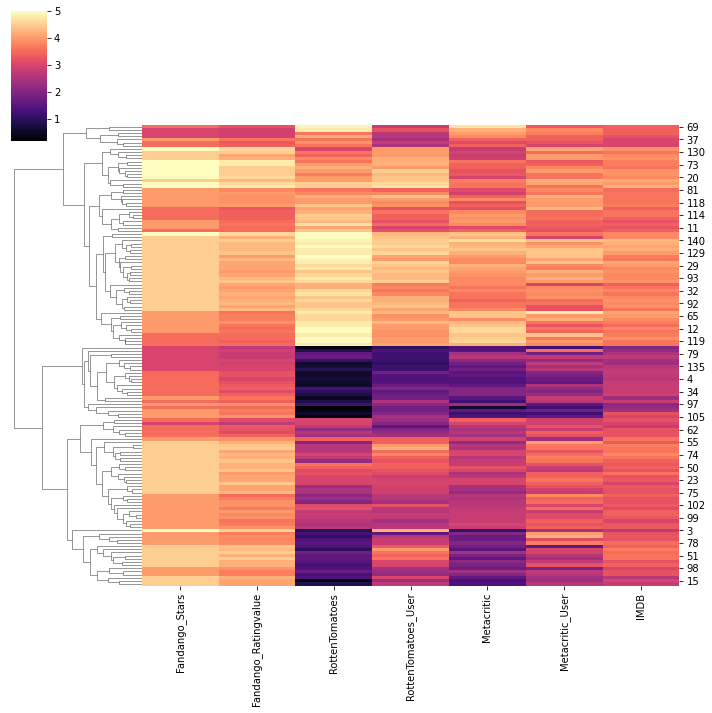

In [69]:
sns.clustermap(normalize_rating, cmap='magma',col_cluster=False)

In [59]:
df.sort_values('RT_norm')[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round']].head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round
133,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.5,2.0,0.5,1.0,2.0
105,Hitman: Agent 47 (2015),4.0,3.9,0.5,2.5,1.5,1.5,3.0
53,Hot Pursuit (2015),4.0,3.7,0.5,2.0,1.5,2.0,2.5
48,Fantastic Four (2015),3.0,2.7,0.5,1.0,1.5,1.5,2.0
15,Taken 3 (2015),4.5,4.1,0.5,2.5,1.5,2.5,3.0
33,The Boy Next Door (2015),4.0,3.6,0.5,2.0,1.5,3.0,2.5
35,The Loft (2015),4.0,3.6,0.5,2.0,1.0,1.0,3.0
60,Unfinished Business (2015),3.5,3.2,0.5,1.5,1.5,2.0,2.5
59,Mortdecai (2015),3.5,3.2,0.5,1.5,1.5,1.5,3.0
58,Seventh Son (2015),3.5,3.2,0.5,2.0,1.5,2.0,3.0


In [60]:
worst=df.sort_values('RT_norm')[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm']].head(10)
worst

,FILM,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm
133,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
105,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
53,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
48,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
15,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
33,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
35,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
60,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
59,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
58,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


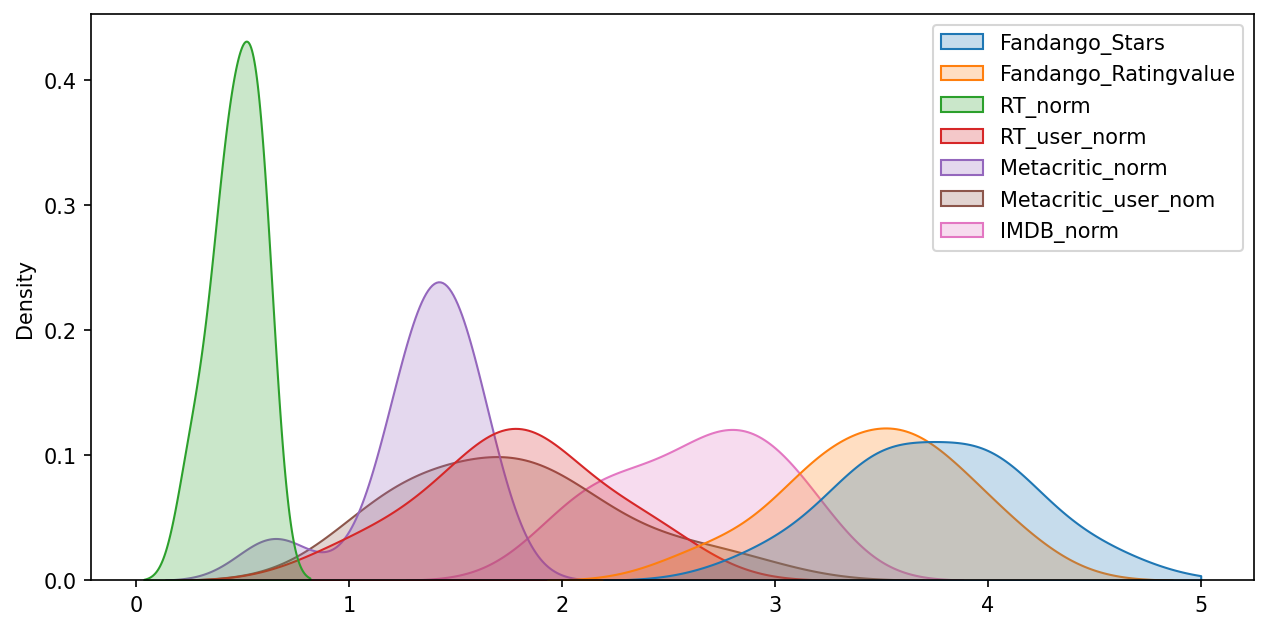

In [61]:
plt.figure(figsize=(10,5),dpi=150)
ax=sns.kdeplot(data = worst,fill=True,clip=(0,5))
move_legend(ax, "upper right")

In [62]:
worst.sort_values('Fandango_Stars',ascending=False)


,FILM,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm
15,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
105,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
53,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
33,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
35,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
133,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
60,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
59,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
58,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75
48,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00


### Fandango завышает оценки особенно сильно это заметно на Taken 3